# Cleaning Data in Python

### 1 Exploring data
Loading, Exploratory data analysis, summary stats,frequency counts, visual exploratory, single vas in histogram, multiple vars with boxplots, multiple vars with scatter plots

### 2 Tidying data for analysis
recognizing tidy data,reshaping data using melt (swapping columns and rows), customizing melted data, pivoting data (opposite of melt),resetting index of DataFrame, pivoting duplicate values,splitting column with .str, .split(), .get()
### 3 Combining data for analysis
concatenating data, combining rows of data, combining columns of data, finding and concatenating files, finding file that match a pattern, iterating and concatenating matches, merge data, 1 to 1 merge, many to 1 merge, many to many merge

### 4 Cleaning data for analysis
data types, converting data types, working with numerical data,using regular expressions to clean strings, string parsing with regular expressions, extracting numerical values from strings, pattern matching, using functions to clean data,custom functions to clean data,lambda fnctions, duplicate and missing data, dropping duplicate data, filling missing data, testing with asserts

### 5 Case study
exploratory analysis, visualizing data, assembling data, reshaping data, checking data types, mor cleaning and processing


#### 1 exploring data
##### Loading and viewing data

In [55]:
'''
Loading and viewing data
Import pandas as pd.
-Read 'dob_job_application_filings_subset.csv' into a DataFrame called df.
-Print the head and tail of df.
-Print the shape of df and its columns. Note: .shape and .columns are attributes, not methods,
so you don't need to follow these with parentheses ().
-Hit 'Submit Answer' to view the results! Notice the suspicious number of 0 values. Perhaps these
represent missing data.
'''

# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_sub.csv')

# Print the head of df
print(df.head(1))

# Print the tail of df
print(df.tail(1))

# Print the shape of df
print(df.shape)



       Job #  Doc #    Borough House #                       Street Name  \
0  121577873      2  MANHATTAN     386  PARK AVENUE SOUTH                  

   Block  Lot    Bin # Job Type Job Status           ...            \
0    857   38  1016890       A2          D           ...             

                Owner's Last Name             Owner's Business Name  \
0  MIGLIORE                        MACKLOWE MANAGEMENT                

  Owner's House Number          Owner'sHouse Street Name            City   \
0                  126  EAST 56TH STREET                  NEW YORK          

  State    Zip Owner'sPhone #  \
0    NY  10222     2125545837   

                                     Job Description              DOBRunDate  
0  GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...  04/26/2013 12:00:00 AM  

[1 rows x 82 columns]
          Job #  Doc # Borough House #                       Street Name  \
3790  220288891      1   BRONX    1050  SOUNDVIEW AVENUE                   

      B

In [4]:
### Further diagnostics
'''
The .info() method provides important information about a DataFrame, such as the number of rows,
number of columns, number of non-missing values in each column, and the data type stored in each
column. This is the kind of information that will allow you to confirm whether the 'Initial Cost'
and 'Total Est. Fee' columns are numeric or strings. From the results, you'll also be able to see
whether or not all columns have complete data in them.
'''
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791 entries, 0 to 3790
Data columns (total 82 columns):
Job #                           3791 non-null int64
Doc #                           3791 non-null int64
Borough                         3791 non-null object
House #                         3791 non-null object
Street Name                     3791 non-null object
Block                           3791 non-null int64
Lot                             3791 non-null int64
Bin #                           3791 non-null int64
Job Type                        3791 non-null object
Job Status                      3791 non-null object
Job Status Descrp               3791 non-null object
Latest Action Date              3791 non-null object
Building Type                   3791 non-null object
Community - Board               3791 non-null object
Cluster                         0 non-null float64
Landmarked                      632 non-null object
Adult Estab                     1 non-null object
Lof

In [5]:
# Print the columns of df
print(df.columns)


Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [8]:
df.describe()

,Job #,Doc #,Block,Lot,Bin #,Cluster,PC Filed,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner Type,Zip,Owner'sPhone #
count,3.791000e+03,3791.000000,3791.000000,3791.000000,3.791000e+03,0.0,0.0,3.791000e+03,3.791000e+03,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,0.0,3.791000e+03,3.791000e+03
mean,2.418390e+08,1.187022,2664.662622,577.264310,2.308348e+06,NaN,NaN,1.104458e+03,1.308648e+03,52.165919,2.963334,8.271169,8.324980,97.188868,97.752836,NaN,1.290086e+06,4.928145e+09
std,1.313071e+08,0.542252,3015.168066,1926.945678,1.400949e+06,NaN,NaN,2.263880e+04,2.339488e+04,973.020044,26.346573,12.241342,12.222709,161.998033,161.807886,NaN,1.142937e+07,2.722382e+09
min,1.036438e+08,1.000000,2.000000,1.000000,1.000003e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.701000e+03,2.012205e+09
25%,1.216047e+08,1.000000,825.000000,10.000000,1.036082e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,18.000000,20.000000,NaN,1.001900e+04,2.126831e+09
50%,2.202106e+08,1.000000,1386.000000,30.000000,2.002947e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000,NaN,1.031000e+04,5.164965e+09
75%,3.207576e+08,1.000000,3333.000000,57.000000,3.336703e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,10.000000,113.000000,114.000000,NaN,1.122100e+04,7.186309e+09
max,5.400225e+08,6.000000,16350.000000,9021.000000,5.864469e+06,NaN,NaN,1.100533e+06,1.100533e+06,50384.000000,777.000000,102.000000,102.000000,4200.000000,4200.000000,NaN,1.169118e+08,9.737684e+09


In [10]:
### Frequency counts
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))



MANHATTAN        1876
BROOKLYN          832
QUEENS            629
BRONX             285
STATEN ISLAND     169
Name: Borough, dtype: int64


In [11]:
# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))


NY    3660
NJ      77
PA      20
CA       7
VA       3
CO       3
TX       3
MA       3
DC       3
UT       2
MD       2
IL       2
OH       1
FL       1
CT       1
NC       1
TN       1
GA       1
Name: State, dtype: int64


In [12]:
# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

NOT APPLICABLE                              2326
NaN                                         1225
ON-SITE                                      109
OFF-SITE                                      81
USE UNDER 300 CU.YD                           50
Name: Site Fill, dtype: int64


### Visualiazing single variables with histograms

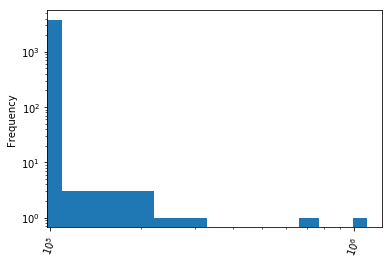

In [20]:
### Visualiazing single variables with histograms
#-Create a histogram of the 'Existing Zoning Sqft' column. Rotate the axis labels by 70 degrees
#and use a log scale for both axes.
#-Display the histogram using plt.show().

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

In [61]:
#convert objects from table to numeric
df.convert_objects(convert_numeric=True).dtypes

C:\Users\dave_\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Job #                         int64
Doc #                         int64
Borough                      object
House #                     float64
Street Name                  object
Block                         int64
Lot                           int64
Bin #                         int64
Job Type                     object
Job Status                   object
Job Status Descrp            object
Latest Action Date           object
Building Type                object
Community - Board           float64
Cluster                     float64
Landmarked                   object
Adult Estab                  object
Loft Board                   object
City Owned                   object
Little e                     object
PC Filed                    float64
eFiling Filed                object
Plumbing                     object
Mechanical                   object
Boiler                       object
Fuel Burning                 object
Fuel Storage                 object
Standpipe                   

In [65]:
#a bit of changes to format of initial cost column from dollars to float64
import numpy as np
df=df.rename(columns={'Initial Cost':'initial_cost'})
df.initial_cost = df.initial_cost.apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('.00','')).astype(np.int64)
#df[df.initial_cost].replace('[\$,]', '', regex=True).astype(float)
#df.initial_cost=pd.to_numeric(df['initial_cost'].str.replace('$',''))

In [69]:
df.initial_cost.describe()

count    3.791000e+03
mean     1.221025e+05
std      5.560239e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.600000e+04
75%      7.000000e+04
max      1.359550e+07
Name: initial_cost, dtype: float64

In [68]:
df.Zip.describe()

count    3.791000e+03
mean     1.290086e+06
std      1.142937e+07
min      1.701000e+03
25%      1.001900e+04
50%      1.031000e+04
75%      1.122100e+04
max      1.169118e+08
Name: Zip, dtype: float64

### Visualiazing multiple variables with boxplot

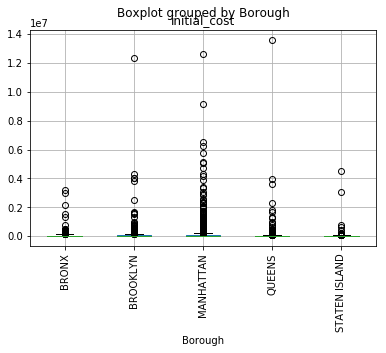

In [71]:
'''
Visualizing multiple variables with boxplots
Histograms are great ways of visualizing single variables. To visualize multiple variables,
boxplots are useful, especially when one of the variables is categorical.

-Using the .boxplot() method of df, create a boxplot of 'initial_cost' across the different
values of 'Borough'.
-Display the plot.
'''


import seaborn as sns

# Create the boxplot

#sns.boxplot(x='initial_cost', y='Borough', data=df, orient='h')
#rot=90 means labels at 90 degrees on x axis
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
#plt.show()


### Visualiazing multiple variables with scatter plots

In [72]:
df=df.rename(columns={'Total Est. Fee':'total_est_fee'})
df.total_est_fee.describe()

count         3791
unique         956
top       $160.00 
freq           258
Name: total_est_fee, dtype: object

In [89]:
df.total_est_fee = df.total_est_fee.apply(lambda x: x.replace('$','')).apply(lambda x: x.replace('.','')).apply(lambda x: x.replace('.40','')).apply(lambda x: x.replace('.60','')).apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('.90','')).apply(lambda x: x.replace('.30','')).apply(lambda x: x.replace('.80','')).apply(lambda x: x.replace('.25','')).apply(lambda x: x.replace('.70','')).apply(lambda x: x.replace('.10','')).apply(lambda x: x.replace('.00','')).astype(np.int64)
#df[df.initial_cost].replace('[\$,]', '', regex=True).astype(float)
df.total_est_fee.describe()

count    3.791000e+03
mean     4.163760e+05
std      1.647659e+07
min      0.000000e+00
25%      2.250000e+04
50%      4.195000e+04
75%      9.345000e+04
max      1.014000e+09
Name: total_est_fee, dtype: float64

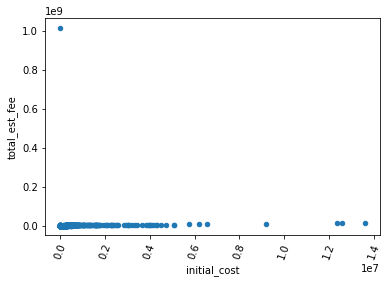

In [90]:
# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()



#### 2 Tiding data for analysis
##### Reshaping data using melt

Melting - means tiding data, to have a table with one row per experiment, so it is easier to analyze

In [1]:
'''
Reshaping your data using melt
Melting data is the process of turning columns of your data into rows of data. Consider the
DataFrames from the previous exercise. In the tidy DataFrame, the variables Ozone, Solar.R,
Wind, and Temp each had their own column. If, however, you wanted these variables to be in
rows instead, you could melt the DataFrame. In doing so, however, you would make the data 
untidy! This is important to keep in mind: Depending on how your data is represented, you
will have to reshape it differently.
In this exercise, you will practice melting a DataFrame using pd.melt(). There are two parameters
you should be aware of: id_vars and value_vars. The id_vars represent the columns of the data you
do not want to melt (i.e., keep it in its current shape), while the value_vars represent the
columns you do wish to melt into rows. By default, if no value_vars are provided, all columns
not set in the id_vars will be melted. This could save a bit of typing, depending on the number
of columns that need to be melted.
The (tidy) DataFrame airquality has been pre-loaded. Your job is to melt its Ozone, Solar.R,
Wind, and Temp columns into rows. Later in this chapter, you'll learn how to bring this melted
DataFrame back into a tidy form.
INSTRUCTIONS
100XP
-Print the head of airquality.
-Use pd.melt() to melt the Ozone, Solar.R, Wind, and Temp columns of airquality into rows. Do
this by using id_vars to specify the columns you do not wish to melt: 'Month' and 'Day'.
-Print the head of airquality_melt.
'''
import pandas as pd

airquality = pd.read_csv('airquality.csv')

# Print the head of airquality
print(airquality.head())



   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


In [2]:
print(airquality.tail())

     Ozone  Solar.R  Wind  Temp  Month  Day
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30


In [ ]:
### how to do melt treatment a and treatment b were separate columns, we want to have data
#al longer table, but have only one column for each treatment
### example of initial table:
# name  treatment_a  treatment_b
# 0 Daniel  12          25
# 1 Max      43         23
 
#melt would be 
#   name    treatment   value
#0  Daniel treatment_a    12
#1 Daniel   treament_b  25
#2 Max        treatment_a  43
#3 Max      treatment_b  23

#to code this:

pd.melt(frame=df, id_vars='name', 
        value_vars=['treatment_a','treatment_b'],
        var_name='treatment', value_name='result')

In [3]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'])

# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN


In [4]:
print(airquality_melt.tail())

     Month  Day variable  value
607      9   26     Temp   70.0
608      9   27     Temp   77.0
609      9   28     Temp   75.0
610      9   29     Temp   76.0
611      9   30     Temp   68.0


In [5]:
## Customizing melted data
'''
Customizing melted data
When melting DataFrames, it would be better to have column names more meaningful than variable
and value.
The default names may work in certain situations, but it's best to always have data that is self
explanatory.
You can rename the variable column by specifying an argument to the var_name parameter, and the
value column by specifying an argument to the value_name parameter. You will now practice doing
exactly this. The DataFrame airquality has been pre-loaded for you.
INSTRUCTIONS
100XP
-Print the head of airquality.
-Melt the Ozone, Solar.R, Wind, and Temp columns of airquality into rows, with the default
variable column renamed to 'measurement' and the default value column renamed to 'reading'.
You can do this by specifying, respectively, the var_name and value_name parameters.
-Print the head of airquality_melt.
'''

# Melt airquality: airquality_melt
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


#### Pivot data

Pivoting - opposite of melting, good to present results (turning columns into rows)
Pivot data
Pivoting data is the opposite of melting it. Remember the tidy form that the airquality DataFrame
was in before you melted it? You'll now begin pivoting it back into that form using the
.pivot_table() method!
While melting takes a set of columns and turns it into a single column, pivoting will create a
new column for each unique value in a specified column.
.pivot_table() has an index parameter which you can use to specify the columns that you don't
want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that
you have to specify are columns (the name of the column you want to pivot), and values (the
values to be used when the column is pivoted). The melted DataFrame airquality_melt has been
pre-loaded for you.
INSTRUCTIONS
100XP
-Print the head of airquality_melt.
-Pivot airquality_melt by using .pivot_table() with the rows indexed by 'Month' and 'Day', the columns indexed by 'measurement', and the values populated with 'reading'.
-Print the head of airquality_pivot.
'''

In [6]:
# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


#### Resetting the index of data frame
After pivoting airquality_melt in the previous exercise, you didn't quite get back the original
DataFrame.
What you got back instead was a pandas DataFrame with a hierarchical index (also known as a
MultiIndex).
Hierarchical indexes are covered in depth in Manipulating DataFrames with pandas. In essence,
they allow you to group columns or rows by another variable - in this case, by 'Month' as
well as 'Day'.
There's a very simple method you can use to get back the original DataFrame from the pivoted
DataFrame: .reset_index(). Dan didn't show you how to use this method in the video, but you're
now going to practice using it in this exercise to get back the original DataFrame from
airquality_pivot, which has been pre-loaded.
INSTRUCTIONS
100XP
-Print the index of airquality_pivot by accessing its .index attribute. This has been done for you.
-Reset the index of airquality_pivot using its .reset_index() method.
-Print the new index of airquality_pivot.
-Print the head of airquality_pivot.
'''

In [8]:
import numpy as np
# Pivot airquality_dup: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
print(airquality_pivot.head())

# Print the head of airquality
print(airquality.head())

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3
   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


### Pivoting duplicate values
pivot has a parameter that specifies how to deal with duplicate values
example:' can aggregate the duplicate values by taking their average

So far, you've used the .pivot_table() method when there are multiple index values you want to
hold constant during a pivot. In the video, Dan showed you how you can also use pivot tables to
deal with duplicate values by providing an aggregation function through the aggfunc parameter.
Here, you're going to combine both these uses of pivot tables.
Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in
which each row is duplicated, has been pre-loaded as airquality_dup. In addition, the
airquality_melt DataFrame from the previous exercise has been pre-loaded. Explore their shapes
in the IPython Shell by accessing their .shape attributes to confirm the duplicate rows present
in airquality_dup.
You'll see that by using .pivot_table() and the aggfunc parameter, you can not only reshape your
data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted
DataFrame using .reset_index().
NumPy and pandas have been imported as np and pd respectively.
INSTRUCTIONS
100XP
-Pivot airquality_dup by using .pivot_table() with the rows indexed by 'Month' and 'Day', the columns indexed by 'measurement', and the values populated with 'reading'. Use np.mean for the aggregation function.
-Flatten airquality_pivot by resetting its index.
-Print the head of airquality_pivot and then the original airquality DataFrame to compare their structure.
'''

In [ ]:
weather2_tidy=weather.pivot_table(values='value',
                                 index='date',
                                 columns='elements',
                                 aggfunc=np.mean)

### Melting and parsing
str[0]  would copy first symbol from one column and add it as a separate column
for example:
initial column variable has a value of m014, we want another column called sex
with value m in it
code it like this:
tb_melt['sex'] = tb_melt.variable.str[0]


#### spliting columns with str()

In [ ]:
'''
Splitting a column with .str
The dataset you saw in the video, consisting of case counts of tuberculosis by country, 
year, gender, and age group, has been pre-loaded into a DataFrame as tb.
In this exercise, you're going to tidy the 'm014' column, which represents
males aged 0-14 years of age. In order to parse this value, you need to extract
the first letter into a new column for gender, and the rest into a column for age_group. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the str attribute of columns of type object.
Begin by printing the columns of tb in the IPython Shell using its .columns attribute, 
and take note of the problematic column.
INSTRUCTIONS
100XP
Melt tb keeping 'country' and 'year' fixed.
Create a 'gender' column by slicing the first letter of the variable column of tb_melt.
Create an 'age_group' column by slicing the rest of the variable column of tb_melt.
Print the head of tb_melt. This has been done for you, so hit 'Submit Answer' to see the results!
'''
# Melt tb: tb_melt
tb_melt = pd.melt(frame=tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

### Splitting column with split() and get()

Another common way multiple variables are stored in columns is with a delimiter. You'll learn how
to deal with such cases in this exercise, using a dataset consisting of Ebola cases and death
counts by state and country. It has been pre-loaded into a DataFrame as ebola.
Print the columns of ebola in the IPython Shell using ebola.columns. Notice that the data has
column names such as Cases_Guinea and Deaths_Guinea. Here, the underscore _ serves as a delimiter
between the first part (cases or deaths), and the second part (country).
This time, you cannot directly slice the variable by position as in the previous exercise. You
now need to use Python's built-in string method called .split(). By default, this method will
split a string into parts separated by a space. However, in this case you want it to split by
an underscore. You can do this on Cases_Guinea, for example, using Cases_Guinea.split('_'),
which returns the list ['Cases', 'Guinea'].
The next challenge is to extract the first element of this list and assign it to a type variable,
and the second element of the list to a country variable. You can accomplish this by accessing
the str attribute of the column and using the .get() method to retrieve the 0 or 1 index, depending
on the part you want.


INSTRUCTIONS
100XP
-Melt ebola using 'Date' and 'Day' as the id_vars, 'type_country' as the var_name, and 'counts'
as the value_name.
-Create a column called 'str_split' by splitting the 'type_country' column of ebola_melt on '_'.
Note that you will first have to access the str attribute of type_country before you can use .split().
-Create a column called 'type' by using the .get() method to retrieve index 0 of the 'str_split'
column of ebola_melt.
-Create a column called 'country' by using the .get() method to retrieve index 1 of the 'str_split'
column of ebola_melt.
-Print the head of ebola. This has been done for you, so hit 'Submit Answer' to view the results!

In [9]:
#read ebola
import pandas as pd

ebola = pd.read_csv('ebola.csv')

# Print the head of airquality
print(ebola.head())

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    01-05-15  289        2776.0            NaN            10030.0   
1    01-04-15  288        2775.0            NaN             9780.0   
2    01-03-15  287        2769.0         8166.0             9722.0   
3    01-02-15  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0          

In [10]:
# Melt ebola: ebola_melt
#-Melt ebola using 'Date' and 'Day' as the id_vars, 'type_country' as the var_name, and 'counts'
#as the value_name.
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

ebola_melt.head(3)

,Date,Day,type_country,counts
0,01-05-15,289,Cases_Guinea,2776.0
1,01-04-15,288,Cases_Guinea,2775.0
2,01-03-15,287,Cases_Guinea,2769.0


In [11]:
# Create the 'str_split' column
#-Create a column called 'str_split' by splitting the 'type_country' column of ebola_melt
#on '_'.
#Note that you will first have to access the str attribute of type_country before you 
#can use .split().
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')
ebola_melt.head(3)

,Date,Day,type_country,counts,str_split
0,01-05-15,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,01-04-15,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,01-03-15,287,Cases_Guinea,2769.0,"[Cases, Guinea]"


In [12]:
# Create the 'type' column
#-Create a column called 'type' by using the .get() method to retrieve index 0 
#of the 'str_split' column of ebola_melt.
ebola_melt['type'] = ebola_melt.str_split.str.get(0)
ebola_melt.head(3)


,Date,Day,type_country,counts,str_split,type
0,01-05-15,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases
1,01-04-15,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases
2,01-03-15,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases


In [13]:
# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())

         Date  Day  type_country  counts        str_split   type country
0    01-05-15  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    01-04-15  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    01-03-15  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    01-02-15  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


## Combining data for analysis

### concatenating data
could be 1 huge file, 5 million row dataset maybe broken into 5 separate datasets, easier to store and share, may have new data for each day, importnat to be eble to combine then clean

#### pandas concat

In [ ]:
concatenated = pd.concat([weather_p1, weather_p2])
###################

pd.concat([weather_p1, weather_p2], ignore_index=True)

In [ ]:
'''
Combining rows of data
The dataset you'll be working with here relates to NYC Uber data. The original dataset has all
the originating Uber pickup locations by time and latitude and longitude. For didactic purposes,
you'll be working with a very small portion of the actual data.
Three DataFrames have been pre-loaded: uber1, which contains data for April 2014, uber2, which
contains data for May 2014, and uber3, which contains data for June 2014. Your job in this exercise
is to concatenate these DataFrames together such that the resulting DataFrame has the data for all
three months.
Begin by exploring the structure of these three DataFrames in the IPython Shell using methods such
as .head().
INSTRUCTIONS
100XP
-Concatenate uber1, uber2, and uber3 together using pd.concat(). You'll have to pass the DataFrames
in as a list.
-Print the shape and then the head of the concatenated DataFrame, row_concat.
'''
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1,uber2,uber3])

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())

In [ ]:
'''
Combining columns of data
Think of column-wise concatenation of data as stitching data together from the sides instead of
the top and bottom. To perform this action, you use the same pd.concat() function, but this time
with the keyword argument axis=1. The default, axis=0, is for a row-wise concatenation.
You'll return to the Ebola dataset you worked with briefly in the last chapter. It has been
pre-loaded into a DataFrame called ebola_melt. In this DataFrame, the status and country of a
patient is contained in a single column. This column has been parsed into a new DataFrame,
status_country, where there are separate columns for status and country.
Explore the ebola_melt and status_country DataFrames in the IPython Shell. Your job is to
concatenate them column-wise in order to obtain a final, clean DataFrame.
INSTRUCTIONS
100XP
-Concatenate ebola_melt and status_country column-wise into a single DataFrame called
ebola_tidy. Be sure to specify axis=1 and to pass the two DataFrames in as a list.
-Print the shape and then the head of the concatenated DataFrame, ebola_tidy.
'''
# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt, status_country], axis=1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
print(ebola_tidy.head())

### Concatenating many files
what if there are thousands of files
glob function to find files based on a pattern

#### Globbing
any cisv file: *.csv
any single character file_?.csv
returns a list of file names
can use this list to load into separate data frames

##### Plan
Load files from globbing into pandas
add the dataframes into a list
concatenate multiple datasets at once

In [15]:
import glob
csv_files=glob.glob('*.csv')
print(csv_files)

['2008_swing_states.csv', 'airquality.csv', 'assets.csv', 'assets2.csv', 'Boston_predicted_price.csv', 'boston_test.csv', 'creditcard.csv', 'diabetes.csv', 'digits.csv', 'digits2.csv', 'dob_job_application_filings_sub.csv', 'ebola.csv', 'finch_beaks_1975.csv', 'finch_beaks_2012.csv', 'fortis_beak_depth_heredity.csv', 'gbm_predict.csv', 'gbm_predict2.csv', 'gdp.csv', 'google.csv', 'google1.csv', 'knn_predict.csv', 'michelson_speed_of_light.csv', 'mnist_test.csv', 'nyse.csv', 'ozone.csv', 'pca.csv', 'pca2.csv', 'PredictedPriceDT.csv', 'PredictedPriceGBM.csv', 'PredictedPriceKNN.csv', 'predictions_boost.csv', 'Prostate_Cancer.csv', 'pulsar_stars.csv', 'sales.csv', 'SampleSubmission_TmnO39y.csv', 'scandens_beak_depth_heredity.csv', 'SP500.csv', 'stocks.csv', 'stock_4.csv', 'stock_data.csv', 'submit_file_8.csv', 'Test_bCtAN1w.csv', 'Test_u94Q5KV.csv', 'train_modified.csv', 'Train_UWu5bXk.csv', 'unrate.csv', 'weather_csv.csv', 'weather_csv2.csv', 'winequality-red.csv', 'world_ind_pop_data.cs

In [ ]:
### using loops
list_data=[]
for filename in csv_files:
    data=pd.read_csv(filename)
    list_data.append(data)
    
pd.concat(list_data)

In [16]:
#practice
'''
Finding files that match a pattern
You're now going to practice using the glob module to find all csv 
files in the workspace.
In the next exercise, you'll programmatically load them into DataFrames.
As Dan showed you in the video, the glob module has a function 
called glob that takes a
pattern and returns a list of the files in the working directory
that match that pattern.
For example, if you know the pattern is part_ single digit number 
.csv, you can write the
pattern as 'part_?.csv' (which would match part_1.csv, 
part_2.csv, part_3.csv, etc.)
Similarly, you can find all .csv files with '*.csv', 
or all parts with 'part_*'. The ?
wildcard represents any 1 character, and the * 
wildcard represents any number of characters.
INSTRUCTIONS
100XP
-Import the glob module along with pandas (as its usual alias pd).
-Write a pattern to match all .csv files.
-Save all files that match the pattern using the glob() function 
within the glob module. That is, by using glob.glob().
-Print the list of file names. This has been done for you.
-Read the second file in csv_files (i.e., index 1) into a DataFrame 
called csv2.
-Hit 'Submit Answer' to print the head of csv2. Does it look familiar?
'''

# Import necessary modules
import glob
import pandas as pd

# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())

['2008_swing_states.csv', 'airquality.csv', 'assets.csv', 'assets2.csv', 'Boston_predicted_price.csv', 'boston_test.csv', 'creditcard.csv', 'diabetes.csv', 'digits.csv', 'digits2.csv', 'dob_job_application_filings_sub.csv', 'ebola.csv', 'finch_beaks_1975.csv', 'finch_beaks_2012.csv', 'fortis_beak_depth_heredity.csv', 'gbm_predict.csv', 'gbm_predict2.csv', 'gdp.csv', 'google.csv', 'google1.csv', 'knn_predict.csv', 'michelson_speed_of_light.csv', 'mnist_test.csv', 'nyse.csv', 'ozone.csv', 'pca.csv', 'pca2.csv', 'PredictedPriceDT.csv', 'PredictedPriceGBM.csv', 'PredictedPriceKNN.csv', 'predictions_boost.csv', 'Prostate_Cancer.csv', 'pulsar_stars.csv', 'sales.csv', 'SampleSubmission_TmnO39y.csv', 'scandens_beak_depth_heredity.csv', 'SP500.csv', 'stocks.csv', 'stock_4.csv', 'stock_data.csv', 'submit_file_8.csv', 'Test_bCtAN1w.csv', 'Test_u94Q5KV.csv', 'train_modified.csv', 'Train_UWu5bXk.csv', 'unrate.csv', 'weather_csv.csv', 'weather_csv2.csv', 'winequality-red.csv', 'world_ind_pop_data.cs

In [ ]:
'''
Iterating and concatenating all matches
Now that you have a list of filenames to load, you can load all the files into a list of DataFrames that can then be concatenated.
You'll start with an empty list called frames. Your job is to use a for loop to iterate through each of the filenames, read each filename into a DataFrame, and then append it to the frames list.
You can then concatenate this list of DataFrames using pd.concat(). Go for it!
INSTRUCTIONS
100XP
-Write a for loop to iterate though csv_files:
-In each iteration of the loop, read csv into a DataFrame called df.
-After creating df, append it to the list frames using the .append() method.
-Concatenate frames into a single DataFrame called uber.
-Hit 'Submit Answer' to see the head and shape of the concatenated DataFrame!
'''
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())

### Merge data
concatenation is not the only way to combine data
Merging data - similar to SQL, combine disparate datasets based on common columns

types or merges: one to one, many to one, one to many. many to many
all use the same function
only difference is the dataframes you are merging

In [ ]:
pd.merge(left=state_populations, right=state_codes, on=None,
         left_on='state', right_one='names')

In [ ]:
# ONE TO ONE MERGE
'''
1-to-1 data merge
Merging data allows you to combine disparate datasets into a single dataset to do more complex analysis.
Here, you'll be using survey data that contains readings that William Dyer, Frank Pabodie, and Valentina Roerich took in the late 1920 and 1930 while they were on an expedition towards Antarctica. The dataset was taken from a sqlite database from the Software Carpentry SQL lesson.
Two DataFrames have been pre-loaded: site and visited. Explore them in the IPython Shell and take note of their structure and column names. Your task is to perform a 1-to-1 merge of these two DataFrames using the 'name' column of site and the 'site' column of visited.
INSTRUCTIONS
100XP
Merge the site and visited DataFrames on the 'name' column of site and 'site' column of visited.
Print the merged DataFrame o2o.
'''
# Merge the DataFrames: m2o
m2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print m2o
print(m2o)

In [ ]:
# MANY TO ONE MERGE
'''
Many-to-1 data merge
In a many-to-one (or one-to-many) merge, one of the values will be duplicated and recycled in the output. That is, one of the keys in the merge is not unique.
Here, the two DataFrames site and visited have been pre-loaded once again. Note that this time, visited has multiple entries for the site column. Confirm this by exploring it in the IPython Shell.
The .merge() method call is the same as the 1-to-1 merge from the previous exercise, but the data and output will be different.
INSTRUCTIONS
100XP
-Merge the site and visited DataFrames on the 'name' column of site and 'site' column of visited, exactly as you did in the previous exercise.
-Print the merged DataFrame and then hit 'Submit Answer' to see the different output produced by this merge!
'''
# Merge the DataFrames: m2o
m2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print m2o
print(m2o)

In [ ]:
# MANY TO MANY MERGE
'''
Many-to-many data merge
The final merging scenario occurs when both DataFrames do not have unique keys for a merge. What happens here is that for each duplicated key, every pairwise combination will be created.
Two example DataFrames that share common key values have been pre-loaded: df1 and df2. Another DataFrame df3, which is the result of df1 merged with df2, has been pre-loaded. All three DataFrames have been printed - look at the output and notice how pairwise combinations have been created. This example is to help you develop your intuition for many-to-many merges.
Here, you'll work with the site and visited DataFrames from before, and a new survey DataFrame. Your task is to merge site and visited as you did in the earlier exercises. You will then merge this merged DataFrame with survey.
Begin by exploring the site, visited, and survey DataFrames in the IPython Shell.
INSTRUCTIONS
100XP
-Merge the site and visited DataFrames on the 'name' column of site and 'site' column of visited, exactly as you did in the previous two exercises. Save the result as m2m.
-Merge the m2m and survey DataFrames on the 'ident' column of m2m and 'taken' column of survey.
-Hit 'Submit Answer' to print the first 20 lines of the merged DataFrame!
'''
# Merge site and visited: m2m
m2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Merge m2m and survey: m2m
m2m = pd.merge(left=m2o, right=survey, left_on='ident', right_on='taken')

# Print the first 20 lines of m2m
print(m2m.head(20))

### Data types
prepare and clean data
numeric columns can be converted to strings,or vice versa

In [18]:
print(csv2.dtypes)

Ozone      float64
Solar.R    float64
Wind       float64
Temp         int64
Month        int64
Day          int64
dtype: object


In [19]:
#converting data types
csv2['Day'] = csv2['Day'].astype(str)
print(csv2.dtypes)

Ozone      float64
Solar.R    float64
Wind       float64
Temp         int64
Month        int64
Day         object
dtype: object


In [20]:
csv2['Month'] = csv2['Month'].astype('category')
print(csv2.dtypes)

Ozone       float64
Solar.R     float64
Wind        float64
Temp          int64
Month      category
Day          object
dtype: object


#convertring categorical data to 'category'  dtype
can make the dataframe smaller in memory
can make them be utilized by other python libraries for analysis

#### cleaning data
numerical data loaded as a string, so convert to numeric

In [22]:
csv2['Month'] = pd.to_numeric(csv2['Month'], errors='coerce')
csv2.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp         int64
Month        int64
Day         object
dtype: object

### Practice: concerting data types

In [23]:
'''
Converting data types
In this exercise, you'll see how ensuring all categorical variables in a DataFrame are of type category reduces memory usage.
The tips dataset has been loaded into a DataFrame called tips. This data contains information about how much a customer tipped, whether the customer was male or female, a smoker or not, etc.
Look at the output of tips.info() in the IPython Shell. You'll note that two columns that should be categorical - sex and smoker - are instead of type object, which is pandas' way of storing arbitrary strings. Your job is to convert these two columns to type category and note the reduced memory usage.
INSTRUCTIONS
100XP
-Convert the sex column of the tips DataFrame to type 'category' using the .astype() method.
-Convert the smoker column of the tips DataFrame.
-Print the memory usage of tips after converting the data types of the columns. Use the .info() method to do this.
'''
import pandas as pd

tips = pd.read_csv('tips.csv')

tips.dtypes


total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
Unnamed: 7    float64
dtype: object

In [24]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
Unnamed: 7    0 non-null float64
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 12.2+ KB
None


#### to_numeric

'''
Working with numeric data
If you expect the data type of a column to be numeric (int or float), but instead it is of type
object, this typically means that there is a non numeric value in the column, which also signifies
bad data.
You can use the pd.to_numeric() function to convert a column into a numeric data type. If the
function raises an error, you can be sure that there is a bad value within the column. You can
either use the techniques you learned in Chapter 1 to do some exploratory data analysis and find
the bad value, or you can choose to ignore or coerce the value into a missing value, NaN.
A modified version of the tips dataset has been pre-loaded into a DataFrame called tips. For
instructional purposes, it has been pre-processed to introduce some 'bad' data for you to clean.
Use the .info() method to explore this. You'll note that the total_bill and tip columns, which
should be numeric, are instead of type object. Your job is to fix this.
INSTRUCTIONS
100XP
-Use pd.to_numeric() to convert the 'total_bill' column of tips to a numeric data type.
Coerce the errors to NaN by specifying the keyword argument errors='coerce'.
-Convert the 'tip' column of 'tips' to a numeric data type exactly as you did for the
'total_bill' column.
-Print the info of tips to confirm that the data types of 'total_bill' and 'tips' are numeric.
'''

In [25]:
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
Unnamed: 7    0 non-null float64
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 12.2+ KB
None


In [26]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
Unnamed: 7    0 non-null float64
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 12.2+ KB
None


### Using regular expressions to clean strings

#### String manipulation
Many built-in and external libraries
're' library for regular expressions
#### Example match
17  - \d*
$17  - \$\d*
$17.00 - \$\d*\.\d*
$17.89  - \$\d*\.\d{2}


#### Using regular expressions


In [ ]:
import re
pattern = re.compile('\$\d*\.\d{2}')
result=pattern.match('$17.89')
bool(result)

In [27]:
'''
String parsing with regular expressions
In the video, Dan introduced you to the basics of regular expressions, which are powerful ways of
defining patterns to match strings. This exercise will get you started with writing them.
When working with data, it is sometimes necessary to write a regular expression to look for
properly entered values. Phone numbers in a dataset is a common field that needs to be checked
for validity. Your job in this exercise is to define a regular expression to match US phone
numbers that fit the pattern of xxx-xxx-xxxx.
The regular expression module in python is re. When performing pattern matching on data,
since the pattern will be used for a match across multiple rows, it's better to compile the
pattern first using re.compile(), and then use the compiled pattern to match values.
INSTRUCTIONS
100XP
Import re.
-Compile a pattern that matches a phone number of the format xxx-xxx-xxxx.
-Use \d{x} to match x digits. Here you'll need to use it three times: twice to match 3 digits,
and once to match 4 digits.
-Place the regular expression inside re.compile().
-Using the .match() method on prog, check whether the pattern matches the string '123-456-7890'.
-Using the same approach, now check whether the pattern matches the string '1123-456-7890'.
'''
# Import the regular expression module
import re

# Compile the pattern: prog
#-Compile a pattern that matches a phone number of the format xxx-xxx-xxxx.
#-Use \d{x} to match x digits. Here you'll need to use it three times:
#twice to match 3 digits,and once to match 4 digits.

prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result = prog.match('1123-456-7890')
print(bool(result))

True
False


In [28]:
### EXTRACTING NUMERICAL VALUES FROM STRINGS
'''
-Import re.
-Write a pattern that will find all the numbers in the following string:
'the recipe calls for 10 strawberries and 1 banana'. To do this:
    -Use the re.findall() function and pass it two arguments: the pattern,
    followed by the string.
    -\d is the pattern required to find digits. This should be followed 
    with a + so that the previous element is matched one or more times.
    This ensures that 10 is viewed as one number and not as 1 and 0.
-Print the matches to confirm that your regular expression found 
the values 10 and 1.
'''
# Import the regular expression module
import re

# Find the numeric values: matches
#-\d is the pattern required to find digits. 
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


In [29]:
'''
Pattern matching
In this exercise, you'll continue practicing your regular expression skills. For each provided string, your job is to write the appropriate pattern to match it.
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
-Write patterns to match:
    -A telephone number of the format xxx-xxx-xxxx. You already did 
    this in a previous exercise.
    -A string of the format: A dollar sign, an arbitrary number 
    of digits, a decimal point, 2 digits.
        -Use \$ to match the dollar sign, \d* to match an arbitrary
        number of digits, \. to match the decimal point, and \d{x} to match x number of digits.
-A capital letter, followed by an arbitrary number of alphanumeric 
characters.
    -Use [A-Z] to match any capital letter followed by \w* to match
    an arbitrary number of alphanumeric characters.
'''
import re

# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='^\$\d*\.\d{2}$', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='w*', string='Australia'))
print(pattern3)

True
True
True


### Custom functions to clean data
cleaning step requires multiple steps: extract number from string, perform transformation on extracted number, python function

In [ ]:
#apply
print(df)
df.apply(nm.mean,axis=0)  #mean verticaly across in table

#or
df.apply(nm.mean,axis=1) #mean horizontaly across in table

import re
from numpy inmport NaN
pattern=re.compile('^\$\d*\.\d{2}$')



#writing a function
def my_function(inout1,input2):
    #function  body
    return value


#write the function
def diff_money(row,pattern):
    icost=row['Initial Cost']
    tef=row['Total Est. Fee']
    if bool(pattern.match(icost) and bool(pattern.match(tef)):
            icost=icost.replace("$","")
            tef=tef.replace("$","")
            
            icost=float(icost)
            tef=float(tef)
            return icost-tef
    else:
            return(NaN)


            
            
#applying function
df_subset['diff'] = df_subset.apply(diff_money, axis=1, pattern=pattern)
print(df_subset.head())

In [1]:
#custom function to clean data exercise
'''
Custom functions to clean data
You'll now practice writing functions to clean data.
The tips dataset has been pre-loaded into a DataFrame called tips. It has a 'sex' column that contains the 
values 'Male' or 'Female'. Your job is to write a function that will recode 'Male' to 1, 'Female' to 0, and 
return np.nan for all entries of 'sex' that are neither 'Male' nor 'Female'.
Recoding variables like this is a common data cleaning task. Functions provide a mechanism for you to abstract
away complex bits of code as well as reuse code. This makes your code more readable and less error prone.
As Dan showed you in the videos, you can use the .apply() method to apply a function across entire rows or 
columns of DataFrames. However, note that each column of a DataFrame is a pandas Series. Functions can also be
applied across Series. Here, you will apply your function over the 'sex' column.


INSTRUCTIONS

-Define a function named recode_sex() that has one parameter: sex_value.
    -If sex_value equals 'Male', return 1.
    -Else, if sex_value equals 'Female', return 0.
    -If sex_value does not equal 'Male' or 'Female', return np.nan. NumPy has been pre-imported for you.
-Apply your recode_sex() function over tips.sex using the .apply() method to create a new column: 'sex_recode'. 
Note that when passing in a function inside the .apply() method, you don't need to specify the parentheses after
the function name.
-Hit 'Submit Answer' and take note of the new 'sex_recode' column in the tips DataFrame!
'''
import pandas as pd
import re

tips = pd.read_csv('tips.csv')
tips.head(3)


,total_bill,tip,sex,smoker,day,time,size,Unnamed: 7
0,16.99,1.01,Female,No,Sun,Dinner,2,NaN
1,10.34,1.66,Male,No,Sun,Dinner,3,NaN
2,21.01,3.50,Male,No,Sun,Dinner,3,NaN


In [2]:
# Define recode_sex()
def recode_sex(sex_value):

    # Return 1 if sex_value is 'Male'
    if sex_value == 'Male':
        return 1
    
    # Return 0 if sex_value is 'Female'    
    elif sex_value == 'Female':
        return 0
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['sex_recode'] = tips.sex.apply(recode_sex)

# Print the first five rows of tips
print(tips.head(3))

   total_bill   tip     sex smoker  day    time  size  Unnamed: 7  sex_recode
0       16.99  1.01  Female     No  Sun  Dinner     2         NaN           0
1       10.34  1.66    Male     No  Sun  Dinner     3         NaN           1
2       21.01  3.50    Male     No  Sun  Dinner     3         NaN           1


### Duplicate and missing data

#### duplicate data
use .drop_duplicates() method

In [ ]:
df=df.drop_duplicates()

#### missing data
leave as-is, drop them, fill missing value

#### count missing values

In [ ]:
#### couunt missing values
tips_nan.info()

#drop missing values
tips_dropped = tips_nan_dropna()


### fill missing values with .fillna()
tips_nan['sex'] = tips_nan['sex'].fillna('missing')

tips_nan[['total_bill','size']]=tips_nan[['total_bill','size']].fillna(0)

#### fill missing values with a test statistic
careful when using test statistics to fill
have to make sure the value you are filling makes sense
median is better statistics in the presence of outliers

#### example of filling

In [ ]:
mean_value = tips_nan['tip'].mean()

tips_nan['tip'] = tips_nan['tip'].fillna(mean_value)

In [3]:
#missing values exercise
'''
INSTRUCTIONS
100XP
-Calculate the mean of the Ozone column of airquality using the .mean() method on airquality.Ozone.
-Use the .fillna() method to replace all the missing values in the Ozone column of airquality with the mean, oz_mean.
-Hit 'Submit Answer' to see the result of filling in the missing values!
'''
import pandas as pd

airquality = pd.read_csv('airquality.csv')
print(airquality.info())

# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.Ozone.fillna(oz_mean)

# Print the info of airquality
print(airquality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
None


In [ ]:
### dropping duplicate data
# Create the new DataFrame: tracks
tracks = billboard[['year','artist','track','time']]

# Print info of tracks
print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
print(tracks_no_duplicates.info())

### Lambda functions

In [ ]:
'''
Lambda functions
You'll now be introduced to a powerful Python feature that will help you clean your data more effectively: lambda functions. Instead of using the def syntax that you used in the previous exercise, lambda functions let you make simple, one-line functions.
For example, here's a function that squares a variable used in an .apply() method:
def my_square(x):
    return x ** 2
df.apply(my_square)
The equivalent code using a lambda function is:
df.apply(lambda x: x ** 2)
The lambda function takes one parameter - the variable x. The function itself just squares x and returns the result, which is whatever the one line of code evaluates to. In this way, lambda functions can make your code concise and Pythonic.
The tips dataset has been pre-loaded into a DataFrame called tips. Your job is to clean its 'total_dollar' column by removing the dollar sign. You'll do this using two different methods: With the .replace() method, and with regular expressions. The regular expression module re has been pre-imported.
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
-Use the .replace() method inside a lambda function to remove the dollar sign from the 
'total_dollar' column of tips.
    -You need to specify two arguments to the .replace() method: The string to be replaced
    ('$'), and the string to replace it by ('').
    -Apply the lambda function over the 'total_dollar' column of tips.
-Use a regular expression to remove the dollar sign from the 'total_dollar' column of tips.
    -The pattern has been provided for you: It is the first argument of the re.findall() 
    function.
    -Complete the rest of the lambda function and apply it over the 'total_dollar'
    column of tips. Notice that because re.findall() returns a list, you have to slice 
    it in order to access the actual value.
Hit 'Submit Answer' to verify that you have removed the dollar sign from the column.
'''
import pandas as pd
import re

tips = pd.read_csv('tips.csv')

# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
print(tips.head())

### Testing with asserts


In [6]:
'''
Testing your data with asserts
Here, you'll practice writing assert statements using the Ebola dataset from previous chapters
to programmatically check for missing values and to confirm that all values are positive.
The dataset has been pre-loaded into a DataFrame called ebola.
In the video, you saw Dan use the .all() method together with the .notnull() DataFrame 
method to check for missing values in a column. The .all() method returns True if all
values are True. When used on a DataFrame, it returns a Series of Booleans - one for each
column in the DataFrame. So if you are using it on a DataFrame, like in this exercise,
you need to chain another .all() method so that you return only one True or False value. 
When using these within an assert statement, nothing will be returned if the assert 
statement is true: This is how you can confirm that the data you are checking are valid.
Note: You can use pd.notnull(df) as an alternative to df.notnull().
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
-Write an assert statement to confirm that there are no missing values in ebola.
    -Use the pd.notnull() function on ebola (or the .notnull() method of ebola) and chain
    two .all() methods (that is, .all().all()). The first .all() method will return a True 
    or False for each column, while the second .all() method will return a single True or False.
-Write an assert statement to confirm that all values in ebola are greater than or equal to 0.
    -Chain two all() methods to the Boolean condition (ebola >= 0).
'''
import pandas as pd

ebola = pd.read_csv('ebola.csv')

# Assert that there are no missing values
assert ebola.notnull().all().all()

# Assert that all values are >= 0
assert (ebola >= 0).all().all()

AssertionError: 

## Case study

#### useful methods for exploration

In [ ]:
import pandas as pd
df=pf.read_csv('my_data.csv')
df.head()
df.info()
df.columns
df.describe()
df.column.value_counts()
df.column_plot('hist')


### visualizing data

(20, 55)

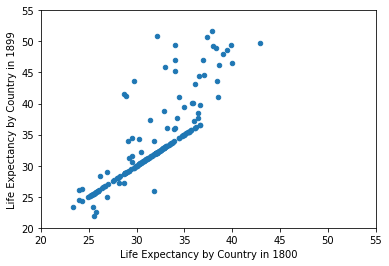

In [8]:
'''
Visualizing your data
Since 1800, life expectancy around the globe has been steadily going up. You would expect the 
Gapminder data to confirm this.
The DataFrame g1800s has been pre-loaded. Your job in this exercise is to create a scatter
plot with life expectancy in '1800' on the x-axis and life expectancy in '1899'
on the y-axis.
Here, the goal is to visually check the data for insights as well as errors.
When looking at the plot, pay attention to whether the scatter plot takes the form of
a diagonal line, and which points fall below or above the diagonal line. This will inform
how life expectancy in 1899 changed (or did not change) compared to 1800 for different 
countries. If points fall on a diagonal line, it means that life expectancy remained the same!
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
-Import matplotlib.pyplot as plt.
-Use the .plot() method on g1800s with kind='scatter' to create a scatter plot with 
'1800' on the x-axis and '1899' on the y-axis.
-Display the plot.
'''
import pandas as pd

g1800s = pd.read_csv('g1800s.csv')

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

In [10]:
'''
Thinking about the question at hand
Since you are given life expectancy level data by country and year, you could ask questions
about how much the average life expectancy changes over each year.
Before continuing, however, it's important to make sure that the following assumptions
about the data are true:
'Life expectancy' is the first column (index 0) of the DataFrame.
The other columns contain either null or numeric values.
The numeric values are all greater than or equal to 0.
There is only one instance of each country.
You can write a function that you can apply over the entire DataFrame to verify 
some of these assumptions. Note that spending the time to write such a script will 
help you when working with other datasets as well.
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
-Define a function called check_null_or_valid() that takes in one argument: row_data.
-Inside the function, convert no_na to a numeric data type using pd.to_numeric().
-Write an assert statement to make sure the first column (index 0) of the g1800s
DataFrame is 'Life expectancy'.
-Write an assert statement to test that all the values are valid for the g1800s DataFrame. 
Use the check_null_or_valid() function placed inside the .apply() method for this.
Note that because you're applying it over the entire DataFrame, and not just one column,
you'll have to chain the .all() method twice, and remember that you don't have to use ()
for functions placed inside .apply().
-Write an assert statement to make sure that each country occurs only once in the data. 
Use the .value_counts() method on the 'Life expectancy' column for this. Specifically, 
index 0 of .value_counts() will contain the most frequently occuring value. If this is 
equal to 1 for the 'Life expectancy' column, then you can be certain that no country 
appears more than once in the data.
'''
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    # convert no_na to a numeric data type using pd.to_numeric()
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

AssertionError: 

In [11]:
### Assembling data
#gapminder=pd.concat([g1800s, g1900s, g2000s])
gapminder=g1800s
print(gapminder.shape)
print(gapminder.head(3))

(780, 102)
   Unnamed: 0        Life expectancy   1800  1801   1802   1803   1804   1805  \
0           0               Abkhazia    NaN   NaN    NaN    NaN    NaN    NaN   
1           1            Afghanistan  28.21  28.2  28.19  28.18  28.17  28.16   
2           2  Akrotiri and Dhekelia    NaN   NaN    NaN    NaN    NaN    NaN   

    1806   1807  ...    1890   1891   1892   1893   1894   1895   1896   1897  \
0    NaN    NaN  ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.15  28.14  ...   27.29  27.28  27.27  27.26  27.25  27.24  27.23  27.22   
2    NaN    NaN  ...     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

    1898  1899  
0    NaN   NaN  
1  27.21  27.2  
2    NaN   NaN  

[3 rows x 102 columns]


In [12]:
#reshaping data
'''
Reshaping your data
Now that you have all the data combined into a single DataFrame, the next step is to reshape
it into a tidy data format.
Currently, the gapminder DataFrame has a separate column for each year. What you want
instead is a single column that contains the year, and a single column that represents
the average life expectancy for each year and country. By having year in its own column, 
you can use it as a predictor variable in a later analysis.
You can convert the DataFrame into the desired tidy format by melting it.
INSTRUCTIONS
100XP
Reshape gapminder by melting it. Keep 'Life expectancy' fixed by specifying it as an
argument to the id_vars parameter.
Rename the three columns of the melted DataFrame to 'country', 'year', and 'life_expectancy'
by passing them in as a list to gapminder_melt.columns.
Print the head of the melted DataFrame.
'''
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(frame=gapminder, id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country        year  life_expectancy
0               Abkhazia  Unnamed: 0              0.0
1            Afghanistan  Unnamed: 0              1.0
2  Akrotiri and Dhekelia  Unnamed: 0              2.0
3                Albania  Unnamed: 0              3.0
4                Algeria  Unnamed: 0              4.0


In [13]:
print(gapminder_melt.tail())

           country  year  life_expectancy
78775   Yugoslavia  1899              NaN
78776       Zambia  1899              NaN
78777     Zimbabwe  1899              NaN
78778       ÌÉland  1899              NaN
78779  South Sudan  1899              NaN


In [17]:
gapminder_melt.head(3)

,country,year,life_expectancy
0,Abkhazia,Unnamed: 0,0.0
1,Afghanistan,Unnamed: 0,1.0
2,Akrotiri and Dhekelia,Unnamed: 0,2.0


In [18]:
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78780 entries, 0 to 78779
Data columns (total 3 columns):
country            78780 non-null object
year               78780 non-null object
life_expectancy    20880 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.8+ MB


In [22]:
#Checking data types
'''
Checking the data types
Now that your data is in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type object, year is of type int64, and life_expectancy is of type float64.
The tidy DataFrame has been pre-loaded as gapminder. Explore it in the IPython Shell using the .info() method. Notice that the column 'year' is of type object. This is incorrect, so you'll need to use the pd.to_numeric() function to convert it to a numeric data type.
NumPy and pandas have been pre-imported as np and pd.
INSTRUCTIONS
100XP
-Convert the year column of gapminder using pd.to_numeric().
-Assert that the country column is of type np.object. This has been done for you.
-Assert that the year column is of type np.int64.
-Assert that the life_expectancy column is of type np.float64.
'''
import numpy as np
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt['year'], errors='coerce')

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

gapminder_melt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78780 entries, 0 to 78779
Data columns (total 3 columns):
country            78780 non-null object
year               78000 non-null float64
life_expectancy    20880 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.8+ MB


In [23]:
# Test if year is of type int64
#will fail
#assert gapminder_melt.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtypes == np.float64


In [24]:
'''
Looking at country spellings
Having tidied your DataFrame and checked the data types, your next task in the data cleaning
process is to look at the 'country' column to see if there are any special or invalid
characters you may need to deal with.
It is reasonable to assume that country names will contain:
The set of lower and upper case letters.
Whitespace between words.
Periods for any abbreviations.
To confirm that this is the case, you can leverage the power of regular expressions again.
For common operations like this, Python has a built-in string method - str.contains() - which 
takes a regular expression pattern, and applies it to the Series, returning True if there 
is a match, and False otherwise.
Since here you want to find the values that do not match, you have to invert the boolean,
which can be done using ~. This Boolean series can then be used to get the Series of
countries that have invalid names.
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
Create a Series called countries consisting of the 'country' column of gapminder.
Drop all duplicates from countries using the .drop_duplicates() method.
Write a regular expression that tests your assumptions of what characters belong 
in countries:
Anchor the pattern to match exactly what you want by placing a ^ in the beginning and
$ in the end.
Use A-Za-z to match the set of lower and upper case letters, \. to match periods, and 
\s to match whitespace between words.
Use str.contains() to create a Boolean vector representing values that match the pattern.
Invert the mask by placing a ~ before it.
Subset the countries series using the .loc[] accessor and mask_inverse. Then hit 'Submit
Answer' to see the invalid country names!
'''
# Create the series of countries: countries
countries = gapminder_melt['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~countries.str.contains(pattern)

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)

49           Congo, Dem. Rep.
50                Congo, Rep.
53              Cote d'Ivoire
73     Falkland Is (Malvinas)
93              Guinea-Bissau
98           Hong Kong, China
118     United Korea (former)
131              Macao, China
132            Macedonia, FYR
145     Micronesia, Fed. Sts.
161           Ngorno-Karabakh
187           St. BarthÌ©lemy
193    St.-Pierre-et-Miquelon
225               Timor-Leste
251     Virgin Islands (U.S.)
252      North Yemen (former)
253      South Yemen (former)
258                    ÌÉland
Name: country, dtype: object


In [28]:
'''
More data cleaning and processing
It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See pandas Foundations for more on forward fill and backward fill.
In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.
In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have NaN in the life_expectancy column. Before doing so, it would be valuable to use assert statements to confirm that year and country do not have any missing values.
Begin by printing the shape of gapminder in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be after dropping the missing values!
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
-Assert that country and year do not contain any missing values. The first assert statement has been written for you. Note the chaining of the .all() method to pd.notnull() to confirm that all values in the column are not null.
-Drop the rows in the data where any observation in life_expectancy is missing. As you confirmed that country and year don't have missing values, you can use the .dropna() method on the entire gapminder DataFrame, because any missing values would have to be in the life_expectancy column. The .dropna() method has the default keyword arguments axis=0 and how='any', which specify that rows with any missing values should be dropped.
-Print the shape of gapminder.
'''
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
#assert pd.notnull(gapminder_melt.year).all()

# Drop the missing values
gapminder = gapminder_melt.dropna()

# Print the shape of gapminder
print(gapminder_melt.shape)

(78780, 3)


year
1800.0    31.486020
1801.0    31.448905
1802.0    31.463483
1803.0    31.377413
1804.0    31.446318
Name: life_expectancy, dtype: float64
year
1895.0    32.811841
1896.0    32.895224
1897.0    32.964279
1898.0    32.994080
1899.0    32.962985
Name: life_expectancy, dtype: float64


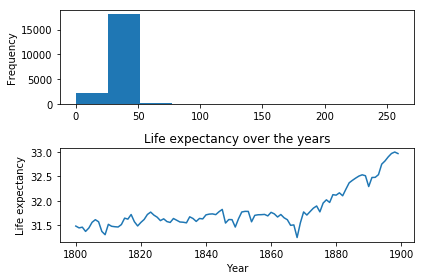

In [29]:
'''
Wrapping up
Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation.
In this exercise, you'll begin by creating a histogram of the life_expectancy column. 
You should not get any values under 0 and you should see something reasonable on the 
higher end of the life_expectancy age range.
Your next task is to investigate how average life expectancy changed over the years.
To do this, you need to subset the data by each year, get the life_expectancy column
from each subset, and take an average of the values. You can achieve this using the 
.groupby() method. This .groupby() method is covered in greater depth in Manipulating 
DataFrames with pandas.
Finally, you can save your tidy and summarized DataFrame to a file using the .to_csv()
method.
Matplotlib and pandas have been pre-imported as plt and pd. Go for it!
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
-Create a histogram of the life_expectancy column using the .plot() method of gapminder. 
Specify kind='hist'.
    -Group gapminder by 'year' and aggregate 'life_expectancy' by the mean. To do this:
        -Use the .groupby() method on gapminder with 'year' as the argument. Then select 
        'life_expectancy' and chain the .mean() method to it.
-Print the head and tail of gapminder_agg. This has been done for you.
-Create a line plot of average life expectancy per year by using the .plot() method 
(without any arguments) on gapminder_agg.
-Save gapminder and gapminder_agg to csv files called 'gapminder.csv' and 
'gapminder_agg.csv', respectively, using the .to_csv() method.
'''
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder_melt.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')